### Common imports and functions

In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [6]:
def plot_audio_waveform(audio, sr, title, color="blue"):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sr, color=color)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()


In [7]:
def plot_with_original_overlay(original, augmented, sr, title, augmented_color):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(original, sr=sr, color='blue', alpha=0.5)
    librosa.display.waveshow(augmented, sr=sr, color=augmented_color, alpha=0.5)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()


## Sampling and Quantizing

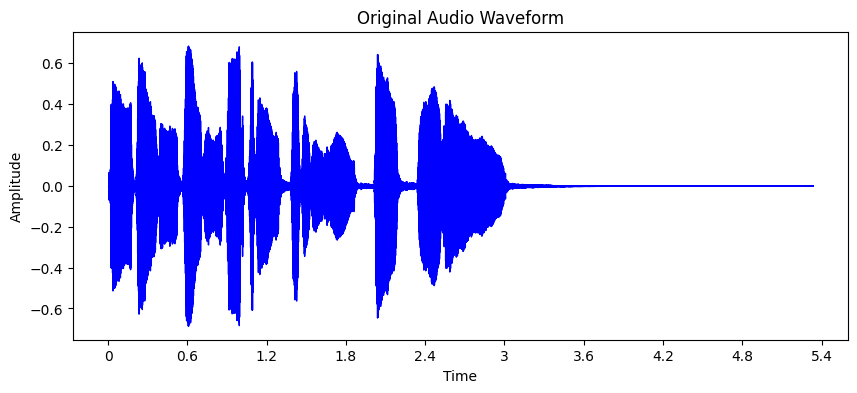

In [8]:
# Load an example audio file from librosa
audio, original_sampling_rate = librosa.load(librosa.ex('trumpet'), sr=None)
display(Audio(audio, rate=original_sampling_rate))

plot_audio_waveform(audio, original_sampling_rate, 'Original Audio Waveform')

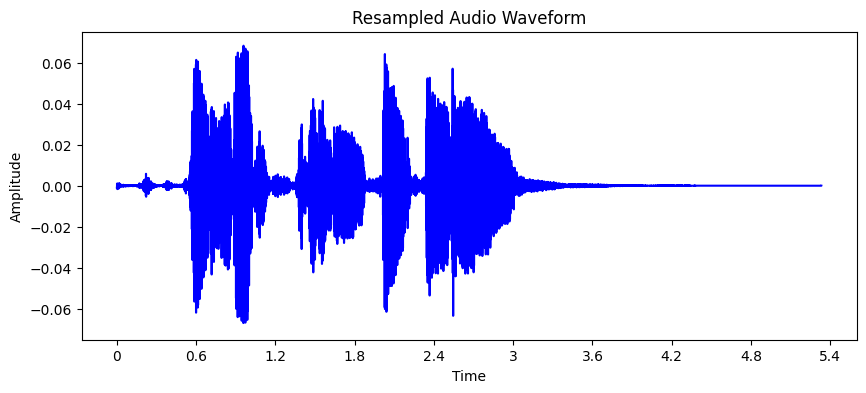

In [9]:
# Resample the audio to a lower sampling rate
target_sampling_rate = 1000
resampled_audio = librosa.resample(audio, orig_sr=original_sampling_rate, target_sr=target_sampling_rate)

plot_audio_waveform(resampled_audio, target_sampling_rate, 'Resampled Audio Waveform')

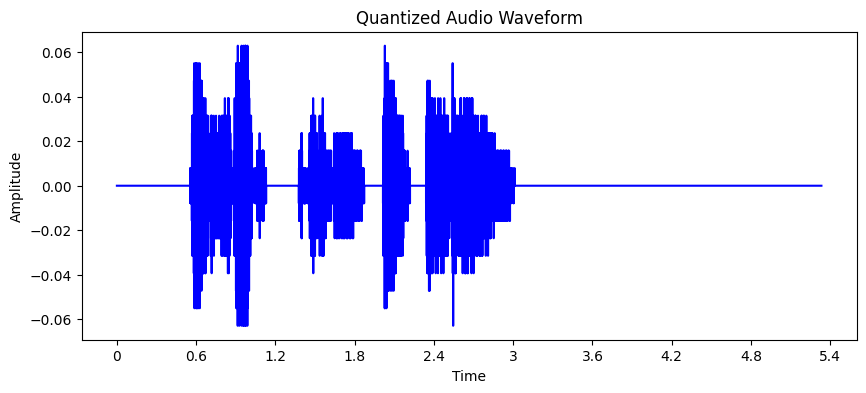

In [11]:
# Quantize the audio data to 8-bit depth
max_val = np.iinfo(np.int8).max
quantized_audio = (resampled_audio * max_val).astype(np.int16)

normalized_quantized_audio = quantized_audio / max_val

plot_audio_waveform(normalized_quantized_audio, target_sampling_rate, 'Quantized Audio Waveform')


In [12]:
print(f"Original Sampling Rate: {original_sampling_rate}, Resampled Rate: {target_sampling_rate}")
print(f"First 10 Samples of Original Audio: {audio[:10]}")
print(f"First 10 Samples of Quantized Audio: {quantized_audio[:10]}")

Original Sampling Rate: 22050, Resampled Rate: 1000
First 10 Samples of Original Audio: [-1.4068222e-03 -4.4607258e-04 -4.1098078e-04  9.9921570e-05
  4.3149794e-05 -1.7485465e-04 -3.6783575e-04  1.4553106e-04
  5.0557934e-04  1.4929953e-03]
First 10 Samples of Quantized Audio: [0 0 0 0 0 0 0 0 0 0]


## Audio Data Augmentation

In [13]:
audio, sr = librosa.load(librosa.ex('trumpet'), sr=None)

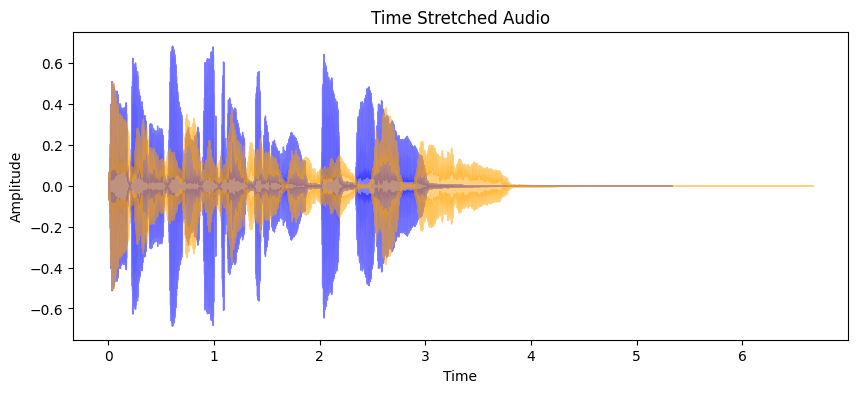

In [14]:
# Time Stretching
time_stretched = librosa.effects.time_stretch(audio, rate=0.8)
plot_with_original_overlay(audio, time_stretched, sr, 'Time Stretched Audio', 'orange')


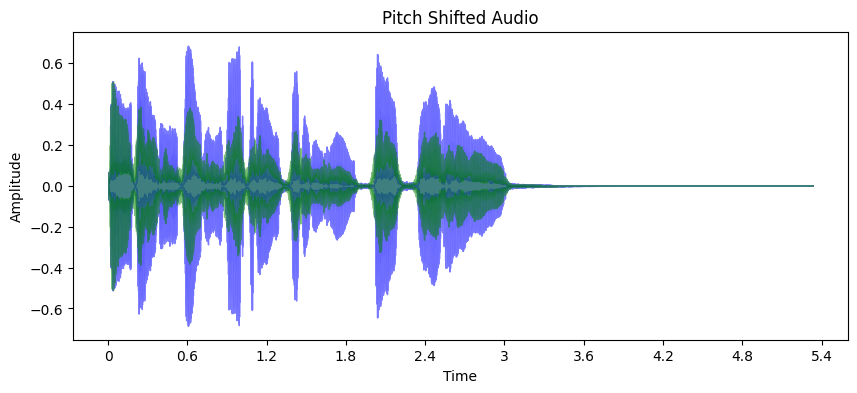

In [15]:
# Pitch Shifting
pitch_shifted = librosa.effects.pitch_shift(audio, sr=sr, n_steps=4)
plot_with_original_overlay(audio, pitch_shifted, sr, 'Pitch Shifted Audio', 'green')


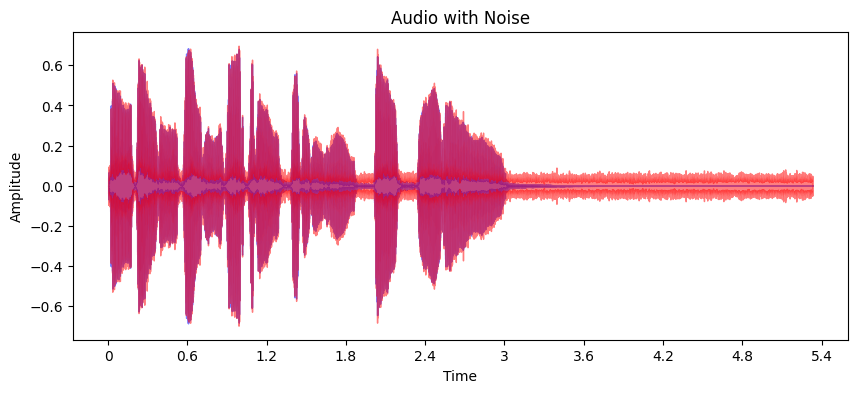

In [18]:
# Adding Noise
noise = np.random.randn(*audio.shape) * 0.02
audio_with_noise = audio + noise
plot_with_original_overlay(audio, audio_with_noise, sr, 'Audio with Noise', 'red')


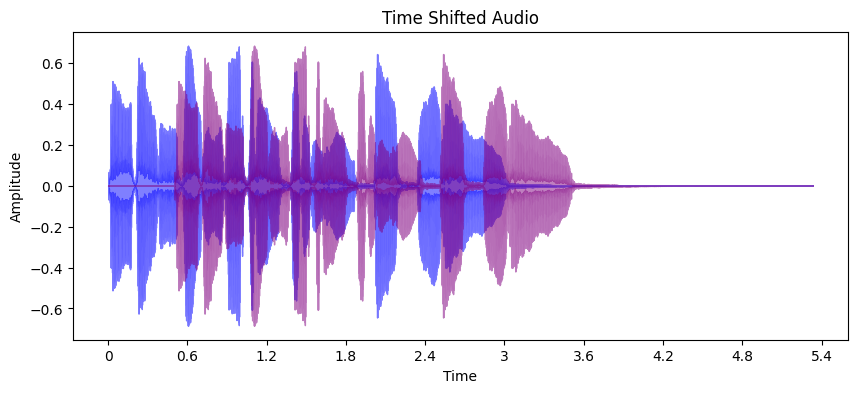

In [ ]:
# Time Shifting
time_shifted = np.roll(audio, shift=int(sr*0.5))
plot_with_original_overlay(audio, time_shifted, sr, 'Time Shifted Audio', 'purple')


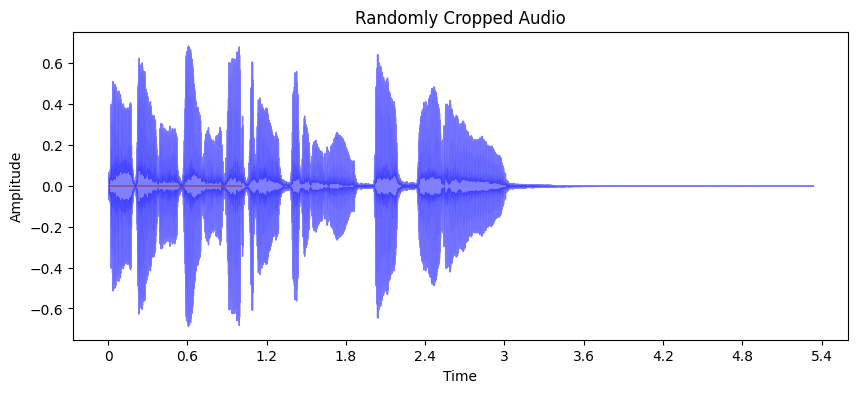

In [ ]:
# Random Cropping
random_idx = np.random.randint(0, len(audio) - sr)  # random starting point
cropped_audio = audio[random_idx:random_idx + sr]
plot_with_original_overlay(audio, cropped_audio, sr, 'Randomly Cropped Audio', 'brown')

## More visualization examples

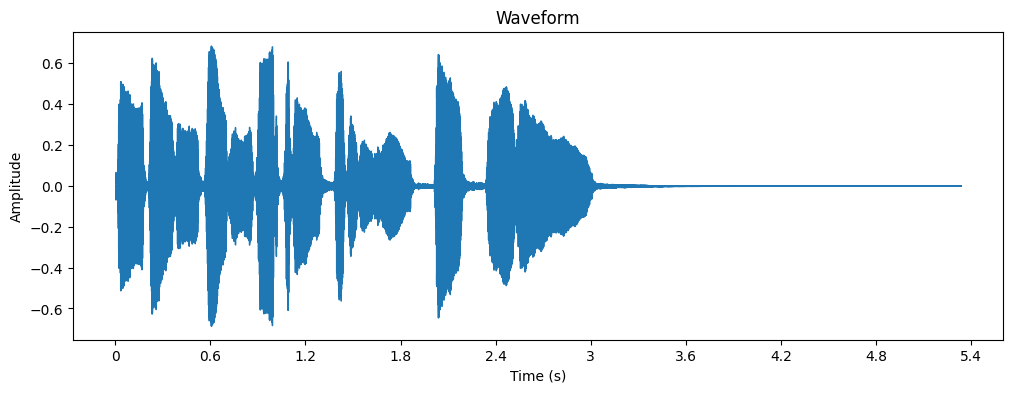

In [ ]:
# Plotting function for waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


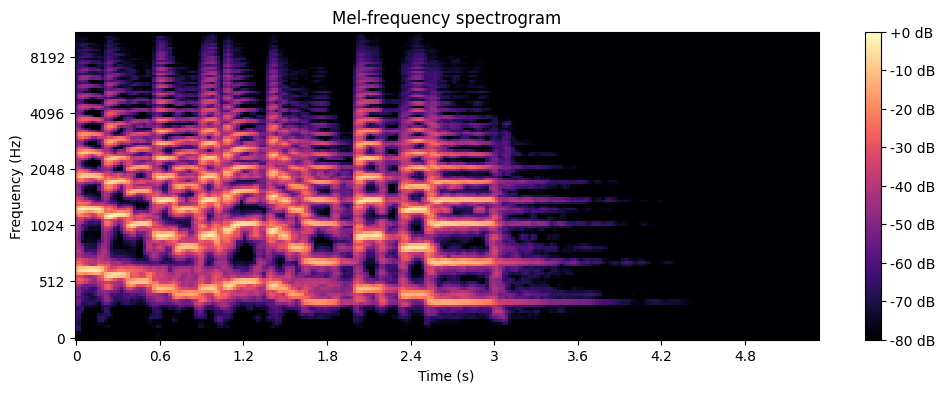

In [ ]:
# Plotting function for spectrogram
plt.figure(figsize=(12, 4))
S = librosa.feature.melspectrogram(y=audio, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

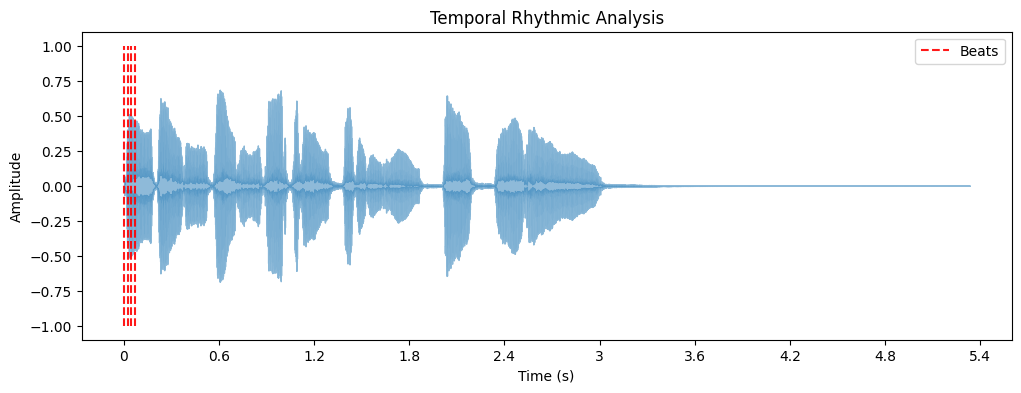

In [ ]:
# Plotting function for Temporal Rhythmic Analysis (Tempo and Beat)
plt.figure(figsize=(12, 4))
tempo, beats = librosa.beat.beat_track(y=audio, sr=sr)
librosa.display.waveshow(audio, sr=sr, alpha=0.5)
times = librosa.times_like(beats, sr=sr)
plt.vlines(times, -1, 1, color='r', alpha=0.9, linestyle='--', label='Beats')
plt.title('Temporal Rhythmic Analysis')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()